<a href="https://colab.research.google.com/github/browndw/humanities_analytics/blob/main/mini_labs/Mini_Lab_01_syuzhet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Lab 01: Texts, Algorithms, and Black-boxes

We're going to start by unpacking the controversy regarding the syuzhet R package. (The readings are short and posted on Canvas, if you haven't looked at them already.) This is a useful exercise, I think, because it gets to some foundational issues in text analysis--you're going to encounter them in your work so they're worth considering from the beginning.

This mini lab will also serve as an introduction to Colab. Note, however, that other labs will be using Python. In this case, the readings cover a specific R package, so this one will be an exception. Even so, it is useful to know that Colab can execute both Python and R code.

## Load packages and data

Install the package that we'll use in this short lab.

In [ ]:
install.packages("syuzhet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘slam’, ‘textshape’, ‘NLP’, ‘zoo’, ‘dtt’




And load it along with tidyverse for data wrangling and plotting.

In [ ]:
library(tidyverse)
library(syuzhet)

Load data from file:

In [ ]:
sentiment_data <- read_tsv("https://github.com/browndw/humanities_analytics/raw/refs/heads/main/data/data_tables/sentiment_data.tsv", show_col_types = FALSE)

The novels that Jockers uses as examples are included as data, which can be accessed as **sentiment_data**. There are 4 novels, and we'll check their names stored in the **doc_id** column.

For this demonstration, we'll be using *Madame Bovary*.

In [ ]:
sentiment_data |>
  select(doc_id)

doc_id
<chr>
madame_bovary
portrait_artist
ragged_dick
silas_lapham


## Prep the data and calculate sentiment

Next, we'll split the the novel into sentences and calculate a sentiment score for each.

In [ ]:
# select the first row/novel
mb <- sentiment_data$text[1]

# chunk the novel into sentences
mb_sentences <- get_sentences(mb)

# calculate and return sentiment scores
mb_sentiment <- get_sentiment(mb_sentences)

In [ ]:
mb_sentiment |>
  data.frame() |>
  head(10)

,mb_sentiment
,<dbl>
1,1.20
2,0.25
3,0.00
4,1.50
5,1.05
6,1.20
7,1.00
8,-0.25
9,0.00


## Transforming the data

The next step is to transform the data. Originally, Jockers used a Fourier transformation, which he described as follows:

> Aaron introduced me to a mathematical formula from signal processing called the Fourier transformation. The Fourier transformation provides a way of decomposing a time based signal and reconstituting it in the frequency domain. A complex signal (such as the one seen above in the first figure in this post) can be decomposed into series of symmetrical waves of varying frequencies. And one of the magical things about the Fourier equation is that these decomposed component sine waves can be added back together (summed) in order to reproduce the original wave form–this is called a backward or reverse transformation. Fourier provides a way of transforming the sentiment-based plot trajectories into an equivalent data form that is independent of the length of the trajectory from beginning to end. The frequency domain begins to solve the book length problem.

This introduced some unwanted outcomes, namely that the resulting wave-forms must begin and end at the same point. The updated function uses a Discrete Cosine Transform (DCT), which is commonly used in data compression.

If you are interested, there is [a detailed explanation here with examples](http://datagenetics.com/blog/november32012/index.html).

In [ ]:
mb_dct <- get_dct_transform(mb_sentiment, low_pass_size = 5, x_reverse_len = 100, scale_vals = FALSE, scale_range = TRUE)

mb_dct <- data.frame(dct = mb_dct) %>%
  rownames_to_column("time") %>%
  mutate(time = as.numeric(time))

Check the data:

In [ ]:
mb_dct |>
  head(10)

,time,dct
,<dbl>,<dbl>
1,1,1.0000000
2,2,0.9974733
3,3,0.9924392
4,4,0.9849363
5,5,0.9750217
6,6,0.9627711
7,7,0.9482778
8,8,0.9316520
9,9,0.9130198


Finally, the values can be plotted.

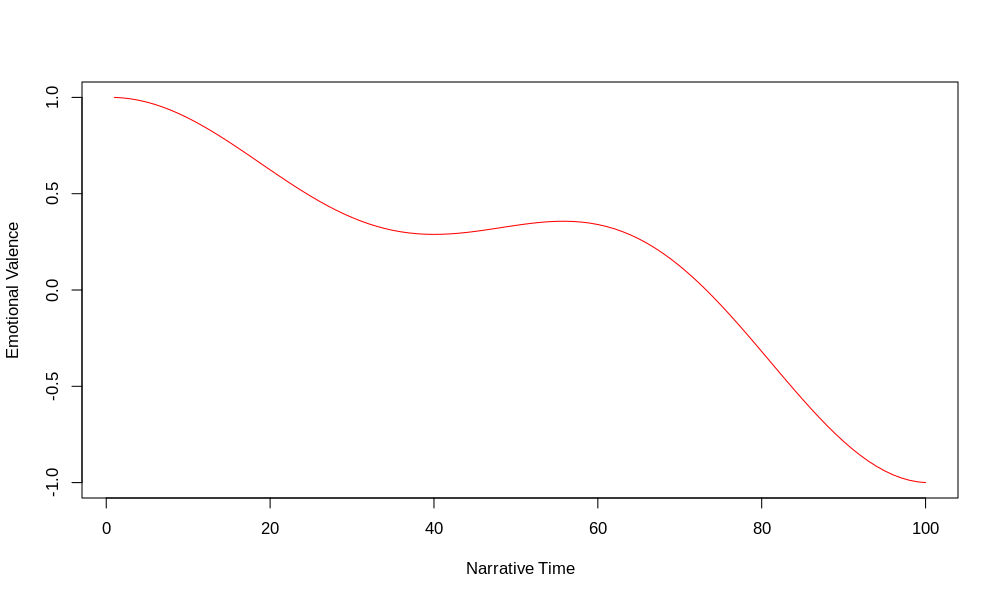

In [ ]:
# set the size of the plot
options(repr.plot.width = 10, repr.plot.height = 6, repr.plot.res = 100)

plot(mb_dct, type ="l", xlab = "Narrative Time", ylab = "Emotional Valence", col = "red")

## Transformed vs. non-transformed data

In order to better compare the before vs. after, let's create a data frame in which we normalize the narrative time values and scale the sentiment scores.

In [ ]:
mb_df <- mb_sentiment %>%
  data.frame(sentiment = .) %>%
  rownames_to_column("time") %>%
  mutate(time = as.numeric(time)) %>%
  mutate(time = time/length(mb_sentiment)*100) %>%
  mutate(sentiment = 2 * (sentiment - min(sentiment))/( max(sentiment) - min(sentiment)) -1)

Now, those values can be plotted with the values extracted from DCT.

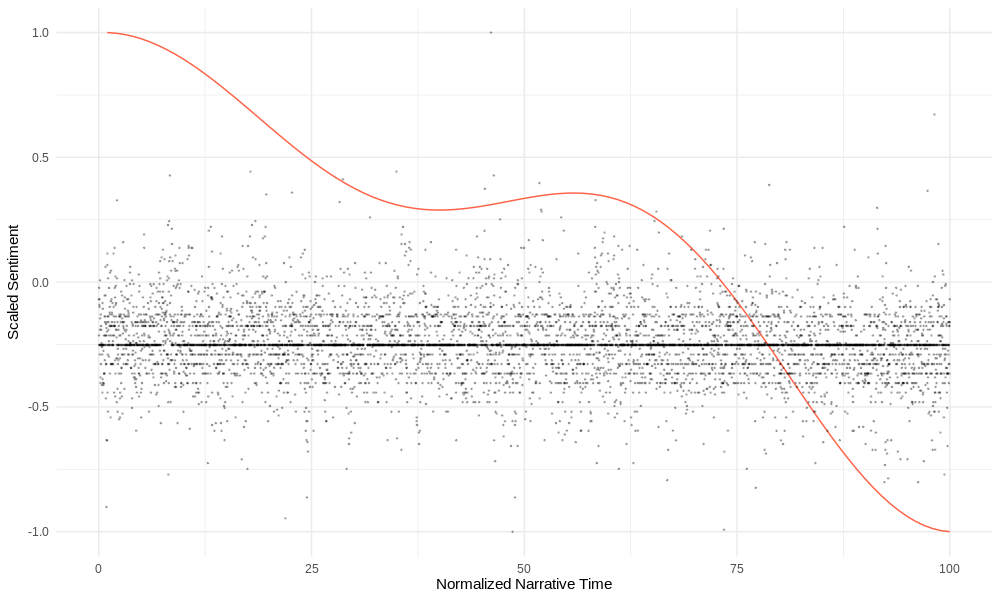

In [ ]:
ggplot(data=mb_dct, aes(x=time, y=dct)) +
  geom_line(colour= "tomato") +
  geom_point(data=mb_df, aes(x=time, y=sentiment), alpha=0.25, size=.25) +
  xlab("Normalized Narrative Time") + ylab("Scaled Sentiment") +
  theme_minimal()

Some questions to discuss:
* What is the distinction Schmidt makes between “algorithms” and “transformations”?
* Is this a useful distinction to make, do you think?
* What are the critiques of Jockers’ syuzhet package that he summarizes?
* What questions, if any, does the reading raise for you?
